In [1]:
#tables and graphs
import pandas as pd
from collections import Counter
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import folium
#map
import geopy
from geopy.geocoders import Nominatim
from time import sleep
#cleaning text
import string
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import numpy as np

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\crnag\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#import data, name columns
data = pd.read_csv('data.csv', encoding='utf-8')
data.columns = ['id', 'time', 'geo', 'lang', 'hashtags', 'text']

In [3]:
#get only english tweets
text = []
date = []
hashes = []
geo = []
for i, item in enumerate(data['lang']):
    if data['lang'][i] == 'en':
        text.append(data['text'][i])
        date.append(data['time'][i])
        hashes.append(data['hashtags'][i])
        geo.append(data['geo'][i])


#cleanup working
for i in range(len(text)):
    try:
        text[i] = bytes(text[i][2:-2], 'utf-8').decode('unicode_escape')
        hashes[i] = bytes(hashes[i][2:-1], 'utf-8').decode('unicode_escape')
        text[i] = re.sub(r'[^\x00-\x7F]+','', text[i])
        text[i] = text[i][:text[i].index('https://t.co/')]
        text[i] = text[i].replace("\n", '')
    except:
        continue
hashtags = []
for item in hashes:
    hashtags.append(item)
hashes_single = []
for i,h in enumerate(hashtags):
    if h == '':
        continue
    else:
        hashes_single.append(hashtags[i].split())
h = []
for i in hashes_single:
    for j in i:
        h.append(j.lower())        
#turn into dataframe
df = pd.DataFrame(columns=['datetime','coordinates','hashes', 'text'])
df['datetime'], df['coordinates'],df['hashes'], df['text'] = [date, geo, hashes, text]

In [4]:
df.head()

,datetime,coordinates,hashes,text
0,2020-04-09 18:35:26,"42.9607521, -80.05056563",,"Hey everyone , wont be streaming until this wh..."
1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ..."
2,2020-04-09 18:48:31,"40.89245946, -74.13999694",,Palestinian national heroine Bisan Al-Jubeh (u...
3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...
4,2020-04-09 18:47:04,"48.47593351, -81.32806152",,Neighbourhood getting loud for healthcare work...


In [5]:
def analyze_sentiment(text):
    '''
    Utility function to classify the polarity of a tweet
    using nltk. analysis variable returns the following dict: 
    {'neg': 0.122, 'neu': 0.641, 'pos': 0.237, 'compound': 0.4215}
    The compound value here conveys the overall positive or negative user experience.
    Examples: 
    https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer
    https://opensourceforu.com/2016/12/analysing-sentiments-nltk/
    '''
    analysis = analyzer.polarity_scores(text)
    
    return analysis['compound']

In [6]:
analyzer = SentimentIntensityAnalyzer()
df['score_sentiment'] = df['text'].apply(analyze_sentiment)

In [7]:
df[df['score_sentiment']<-0.9]

,datetime,coordinates,hashes,text,score_sentiment
376,2020-04-11 12:50:58,"33.7566, -84.3889",covid helpmeunderetand,The More read up on this shit the more I belie...,-0.9485
526,2020-04-12 00:44:32,"45.6677507, -73.47935661",,Fighting Stigma : Children's ombudsman Niall M...,-0.9186
632,2020-04-12 06:15:02,"46.5215, -84.3197",,"This sucks, but let's do something about it.Le...",-0.9520
1021,2020-04-14 22:47:40,"39.7692, -86.1582",,Its a shame that my solo exhibition: Immigrant...,-0.9022
1115,2020-04-16 08:22:55,"1.29306, 103.856",,The War Discourse Trap[]It is common to frame ...,-0.9360
1300,2020-04-17 09:27:20,"40.0566, -76.30525",,The COVID-19 crisis is causing different chall...,-0.9186
1359,2020-04-17 12:13:18,"51.5141, -0.1094",,More Nigerians have been killed by security fo...,-0.9001
2247,2020-04-25 08:39:45,"38.11805556, 13.37388889",,Italy is currently experiencing the worst cri...,-0.9382
2257,2020-04-25 09:15:57,"6.43111111, 3.41583333",,"Police in India, stopped Lockdown violators, a...",-0.9150
2429,2020-04-25 17:07:16,"34.17614746, -85.87856076",,@baldheaded_john @IngrahamAngle if thats the c...,-0.9062


Positive tweets: Due to Covid we are unable to borrow dresses for Lotto at the moment, but this week I was SO kindly gifted this dress from Sunshine Coast label loulouaustralia thank you for the lovely surprise. And thanks to 

Neutral tweet: Just a reminder we are still in lockdown!#LEGO #legocity #police #policestation #jail #corona #covid19 #covid #lockdown @ Ireland (country) 

Negative tweet: #Coronavirus: Florida #DataScientist was fired by the evil Republican-elite for refusing to 'manipulate' #COVID19 #Data to hide proof of the GOP's genocide &amp; mass murder!This is Trump's Nazi America now! If they win in Nov, expect tens of millions dead!


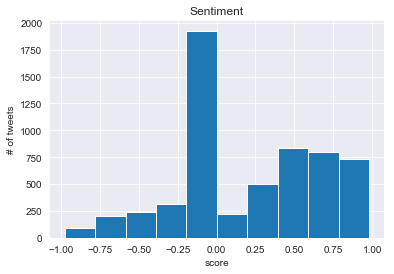

In [8]:
sns.set_style("darkgrid")
df['score_sentiment'].hist()
plt.title('Sentiment')
plt.ylabel('# of tweets')
plt.xlabel('score')
print('Positive tweets:', df['text'][df.score_sentiment.idxmax()])
print('')
print('Neutral tweet:', df['text'][99])
print('')
print('Negative tweet:', df['text'][4617])

In [9]:
def sentiment_score(compound):
    if compound > 0.33:
        return 1
    elif compound < -0.33:
        return -1
    else:
        return 0

In [10]:
df['tweet_sentiment_score'] = df['score_sentiment'].apply(sentiment_score)
df['tweet_sentiment_score'].value_counts()

 0    2640
 1    2588
-1     639
Name: tweet_sentiment_score, dtype: int64

In [11]:
def sentiment_label(score):
    if score == 1:
        return 'positive'
    elif score == -1:
        return 'negative'
    else:
        return 'neutral'

In [12]:
df['label'] = df['tweet_sentiment_score'].apply(sentiment_label)

In [13]:
df['label'].value_counts()

neutral     2640
positive    2588
negative     639
Name: label, dtype: int64

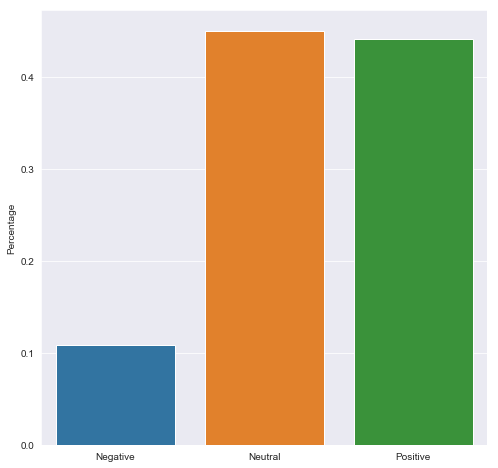

In [14]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.tweet_sentiment_score.value_counts(normalize=True)
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.savefig('sentiment.png')

In [15]:
df.head(20)

,datetime,coordinates,hashes,text,score_sentiment,tweet_sentiment_score,label
0,2020-04-09 18:35:26,"42.9607521, -80.05056563",,"Hey everyone , wont be streaming until this wh...",0.4215,1,positive
1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ...",0.3818,1,positive
2,2020-04-09 18:48:31,"40.89245946, -74.13999694",,Palestinian national heroine Bisan Al-Jubeh (u...,0.5719,1,positive
3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...,0.5719,1,positive
4,2020-04-09 18:47:04,"48.47593351, -81.32806152",,Neighbourhood getting loud for healthcare work...,0.0000,0,neutral
5,2020-04-09 18:46:22,"33.19277, -96.99155",whatdayisit covid shelterinplace kmarkrealtor ...,Its Thursday in case anyone was wondering #wha...,0.0000,0,neutral
6,2020-04-09 18:45:39,"33.67, -117.78",,From @ienearth MONDAY APRIL 13THJoin Indigenou...,0.4939,1,positive
7,2020-04-09 18:45:19,"40.0675, -82.5122",,covid-19 pandemic quarantinethese arethe peopl...,0.4648,1,positive
8,2020-04-09 18:44:30,"51.60832483, -0.039755",,Today U-Build and @Buildingbloqs joined the na...,-0.2732,0,neutral
9,2020-04-09 18:44:12,"29.9014205, -97.99685148",,"Join us in ringing bells to thank our doctors,...",0.5719,1,positive


Text(0.5,0,'Hashtag')

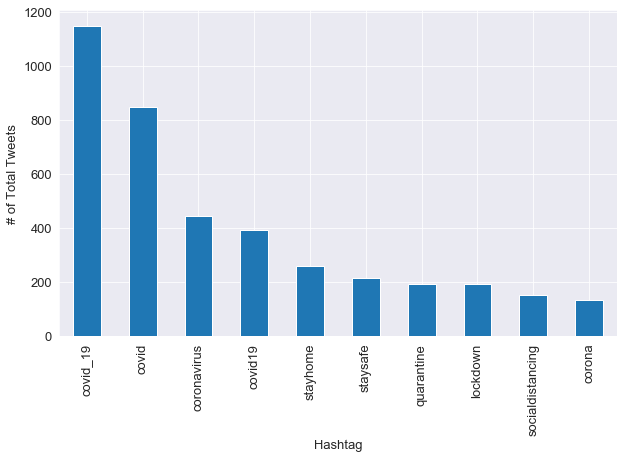

In [16]:
sns.set_style("darkgrid")
hashes_single = pd.Series(h)

x = hashes_single
#x = x[x!='covid']

x = x.value_counts().head(10)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C0')
plt.ylabel('# of Total Tweets', fontsize=13)
plt.xlabel('Hashtag', fontsize=13)

Text(0.5,0,'Language')

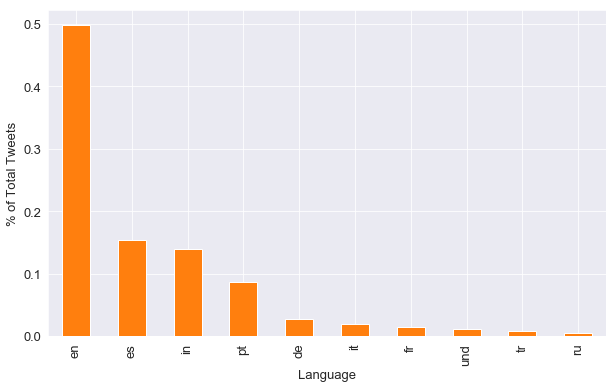

In [17]:
sns.set_style("darkgrid")
x = data['lang'].value_counts(1).head(10)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C1')
plt.ylabel('% of Total Tweets', fontsize=13)
plt.xlabel('Language', fontsize=13)

In [18]:
geolocator = Nominatim(user_agent="corona_map_sentiment")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=2, error_wait_seconds=20)

In [19]:
coordinates = []
for c in df.coordinates:
    coor = c.split(", ")
    coordinates.append(coor)

In [72]:
location = []
i = 0
while True:
    
    #print(i)
    try:
        loc = df.coordinates.iloc[i]
        loc = ", ".join(["{:.4f}".format(float(n)) for n in loc.split(", ")])
        loc = geolocator.reverse(loc, language='en')
        if loc[0]:
            location.append(str(loc))
        else:
            location.append("")
        i += 1
    
    except Exception as e:
        print(e)
        sleep(30)

    if i == len(coordinates):
        break

0
[Errno 11001] getaddrinfo failed
0
[Errno 11001] getaddrinfo failed
0
[Errno 11001] getaddrinfo failed
0
[Errno 11001] getaddrinfo failed
0
[Errno 11001] getaddrinfo failed
0
[Errno 11001] getaddrinfo failed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
Service timed out
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219

In [73]:
df['country'] = [loc.split(', ')[-1] for loc in location]

In [74]:
df.tail()

,datetime,coordinates,hashes,text,score_sentiment,tweet_sentiment_score,label,country
5862,2020-05-23 11:04:51,"14.62732, 120.99361",EventBasics,#EventBasics: 3 Ways to Celebrate Weddings/Bap...,0.3612,1,positive,Philippines
5863,2020-05-23 11:03:34,"38.7261, -9.1394",,My studio is ready. All the COVID-19 Safety Me...,0.7506,1,positive,Portugal
5864,2020-05-23 10:59:37,"51.77531744, 0.59187536",,"As well as providing takeaway to you all, ever...",0.3382,1,positive,United Kingdom
5865,2020-05-23 10:59:05,"25.7751, -80.1936",,"Maybe shes born with it, maybe its Covid-19. (...",-0.2755,0,neutral,United States of America
5866,2020-05-23 10:52:36,"14.54956298, 121.05353236",badbird Covid_19,"Since I was in BGC, decided to have a treat. ...",0.2944,0,neutral,Philippines


In [75]:
map_data = df.groupby('country', as_index=False)['tweet_sentiment_score'].mean()

In [95]:
map_data['country']

0                                 
1                          Albania
2                          Algeria
3                          Andorra
4                           Angola
5                        Argentina
6                        Australia
7                          Austria
8                      The Bahamas
9                          Bahrain
10                      Bangladesh
11                        Barbados
12                         Belgium
13                           Benin
14                         Bermuda
15                         Bolivia
16          Bosnia and Herzegovina
17                        Botswana
18                          Brazil
19                          Brunei
20                        Cambodia
21                        Cameroon
22                          Canada
23                            Chad
24                           Chile
25                           China
26                        Colombia
27                      Costa Rica
28                  

In [89]:
map_data['country'].iloc[95] = 'Republic of Serbia'
map_data['country'].iloc[106] = 'United Republic of Tanzania'
map_data['country'].iloc[108] = 'Netherlands'
map_data['country'].iloc[57] = 'Jamaica'
map_data['country'].iloc[8] = 'The Bahamas'
map_data['country'].iloc[19] = 'Brunei'
map_data['country'].iloc[31] = 'Ivory Coast'




#Missing countries: Tuvalu, Singapore, Palestinian Territory, Malta, Maldives, Jersey, Bahrain, Barbados, Bermuda

C:\Users\crnag\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
map_data.sort_values(by='country');

In [91]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [92]:
the_map = folium.Map(tiles="cartodbpositron")
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=map_data,
    columns=['country', 'tweet_sentiment_score'],
    key_on='feature.properties.name',
    fill_color='RdBu',
    nan_fill_color='gray',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(the_map)

the_map

In [96]:
the_map.save('map.html')